In [53]:
import os
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop

In [23]:
shapes = []
cats = os.listdir("train")
for filename in cats:
    cat = plt.imread(f"train/{filename}")
    shapes.append(cat.shape)
    if cat.dtype not in dtypes:
shapes = np.array(shapes)

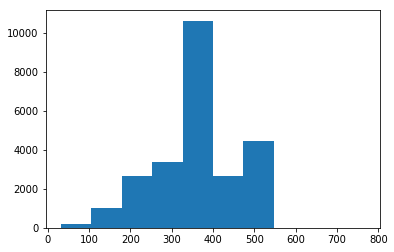

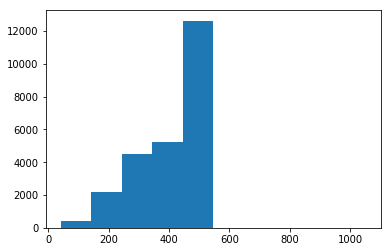

In [28]:
plt.hist(shapes[:, 0])
plt.show()
plt.hist(shapes[:, 1])
plt.show()

In [83]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1)

train_generator = train_datagen.flow_from_directory(
    "train",
    target_size=(150, 150),
    classes=["dogs", "cats"],
    class_mode='binary',
    batch_size=128
)

Found 25000 images belonging to 2 classes.


In [41]:
(x, y) = next(train_generator)

In [86]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [87]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 18496)            

In [85]:
model.fit_generator(train_generator, epochs=3)

Epoch 1/3
  8/196 [>.............................] - ETA: 8:13 - loss: 0.7256 - accuracy: 0.4990

KeyboardInterrupt: 

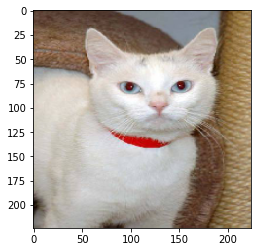

In [51]:
plt.imshow(x[6, :, :, :])

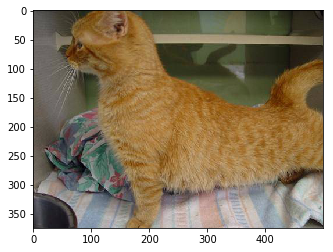

In [65]:
plt.imshow(cat)

In [71]:
gen = train_datagen.flow(np.expand_dims(cat, axis=0), batch_size=1)
cats = []
i = 0
for batch in gen:
    cats.append(batch[0])
    i = i + 1
    if i >= 10:
        break
    

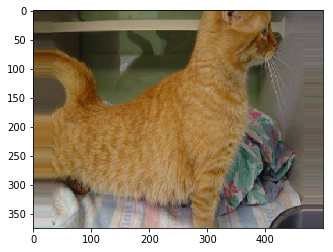

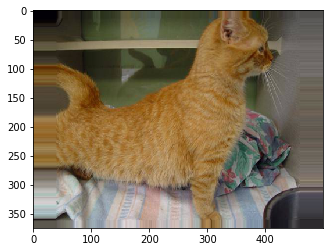

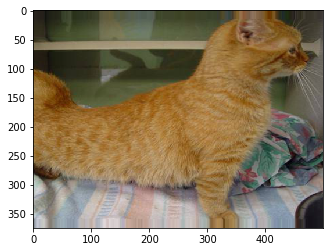

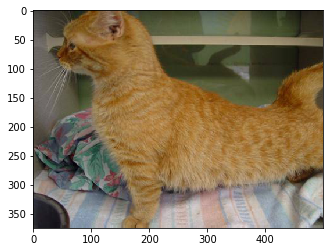

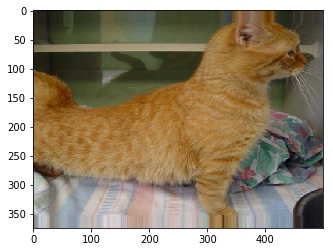

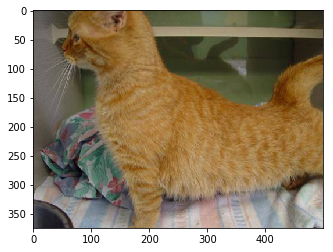

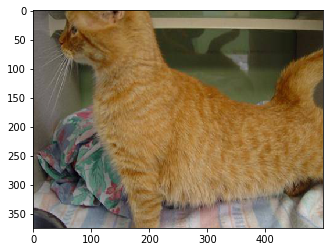

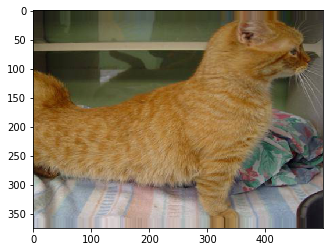

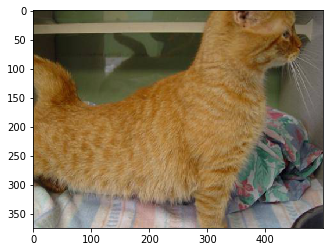

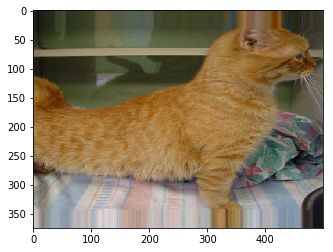

In [75]:
for cat in cats:
    plt.imshow(cat)
    plt.show()